В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1308]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [1309]:
df_temp = pd.read_csv('cars.csv')
df_temp.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [1310]:
# Прибираю car_id після того, як в завданні 8 побачила коефіцієнт при параметрі
df = df_temp.drop(columns='Car_ID')
df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [1311]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [1312]:
df.columns = df.columns.str.lower()

In [1313]:
numeric_df = df.select_dtypes(include='number')
string_df = df.select_dtypes(exclude='number')
numeric_df.columns, string_df.columns

(Index(['year', 'kilometers_driven', 'mileage', 'engine', 'power', 'seats',
        'price'],
       dtype='object'),
 Index(['brand', 'model', 'fuel_type', 'transmission', 'owner_type'], dtype='object'))

In [1314]:
string_df.nunique()

,0
brand,11
model,58
fuel_type,2
transmission,2
owner_type,3


In [1315]:
df.brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [1316]:
df.owner_type.value_counts()

,count
owner_type,
First,44
Second,43
Third,13


In [1317]:
df.describe()

,year,kilometers_driven,mileage,engine,power,seats,price
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


### Висновок 2
- null значень нема
- 7 числових колонок(без car_id - key value)
- 5 категоріальних (2 колонки мають по два значення (бінарні), 1 колонка має 3 значення (мультикатегоріальна з порядком), 2 колонки мають 10+ значеннь - (мультикатегоріальні без порядку).



**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [1318]:
X = df.drop(columns='price')
y = df['price']

In [1319]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=12
)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [1320]:
X_train.fuel_type.value_counts()

,count
fuel_type,
Petrol,41
Diesel,39


In [1321]:
is_petrol = {'Petrol': 1, 'Diesel': 0}
X_train['is_petrol'] = X_train.fuel_type.map(is_petrol)
X_test['is_petrol'] = X_test.fuel_type.map(is_petrol)

In [1333]:
X_train.is_petrol.unique()

array([1, 0])

In [1327]:
X_train.transmission.value_counts()

,count
transmission,
Automatic,49
Manual,31


In [1328]:
is_auto = {'Automatic': 1, 'Manual': 0}
X_train['is_auto'] = X_train.transmission.map(is_auto)
X_test['is_auto'] = X_test.transmission.map(is_auto)

In [1329]:
X_train.is_auto.value_counts()

,count
is_auto,
1,49
0,31


In [1334]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [1335]:
one_hot_train = enc.transform(X_train[['brand']]).toarray()
one_hot_test= enc.transform(X_test[['brand']]).toarray()

In [1336]:
X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test

In [1337]:
X_train.head()

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1338]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['owner_type']])

X_train['owner_type_codes'] = ordenc.transform(X_train[['owner_type']])
X_test['owner_type_codes'] = ordenc.transform(X_test[['owner_type']])

In [1339]:
X_train.model.unique()


array(['T-Roc', 'A5', 'A6', 'Vento', 'GLC', 'C-Class', 'Q7', 'Altroz',
       'A3', 'XUV300', 'S-Cross', 'X3', 'Tiago', 'Mustang', 'Fortuner',
       'GLE', 'Yaris', 'Ranger', 'Innova', 'E-Class', 'Innova Crysta',
       'Vitara', 'Ameo', 'WR-V', 'Tigor', 'Santro', 'X5', 'Venue',
       'Endeavour', '7 Series', 'BR-V', 'Civic', 'Elantra', 'Sonata',
       '3 Series', 'Passat', 'EcoSport', 'Verna', 'Safari', '5 Series',
       'Aspire', 'Thar', 'Camry', 'Corolla', 'Harrier', 'Nexon', 'GLA',
       'Swift', 'Scorpio'], dtype=object)

### Коментар до завдання 4.
Я додала сегментацію за фічею model. Сегментація базувалася на ринковій вартості даної модлелі. Результати тестового сету показала кращу точність 96.43%, але на тестовому отримала щось взагалі не те. Тим паче сегмент був обраним за ринковою вартістю, а отже така сегментація призводить до перенавчання моделі.
Loss: train:195238.20370078925 test:1029993.2886494298
R2: train: 0.9643394981494642 test:-1.3457958533175622

Я не буду включати її до подальшого використання.

In [1247]:
# from math import nan
# model_to_segment = {

#     "Santro": 1,
#     "Tiago": 1,
#     "Swift": 1,
#     "Tigor": 1,
#     "Aspire": 1,
#     "Altroz": 1,
#     "Ameo": 1,

#     "Civic": 2,
#     "Corolla": 2,
#     "Verna": 2,
#     "Yaris": 2,
#     "S-Cross": 2,
#     "WR-V": 2,
#     "BR-V": 2,
#     "Venue": 2,
#     "EcoSport": 2,
#     "Nexon": 2,
#     "Harrier": 2,
#     "Safari": 2,
#     "Vitara": 2,
#     "Elantra": 2,
#     "Sonata": 2,
#     "Vento": 2,
#     "Passat": 2,

#     "Fortuner": 3,
#     "Endeavour": 3,
#     "Scorpio": 3,
#     "Ranger": 3,
#     "XUV300": 3,
#     "Thar": 3,
#     "Innova": 3,
#     "Innova Crysta": 3,

#     "A3": 4,
#     "A5": 4,
#     "A6": 4,
#     "Q7": 4,
#     "GLC": 4,
#     "GLE": 4,
#     "GLA": 4,
#     "C-Class": 4,
#     "E-Class": 4,
#     "3 Series": 4,
#     "5 Series": 4,
#     "7 Series": 4,
#     "X3": 4,
#     "X5": 4,
#     "Camry": 4,
#     "T-Roc": 4,
#     "Mustang": 4,
# }

# X_train["segment"] = X_train["model"].map(model_to_segment).fillna(-5)
# X_test["segment"] = X_test["model"].map(model_to_segment).fillna(-5)

In [1340]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Очікуваний результат після трансформацій:

In [1341]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [1342]:
X_train.select_dtypes(include='number').nunique()

,0
year,6
kilometers_driven,17
mileage,15
engine,35
power,37
seats,3
is_petrol,2
is_auto,2
Audi,2
BMW,2


In [1343]:
df_train=pd.concat([X_train, y_train], axis=1)
df_train.head()

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes,price
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000


In [1344]:
corr_with_price = (
    df_train
        .select_dtypes(include='number')
        .corr()['price']
        .drop('price')
        .sort_values(ascending=False)
)
corr_with_price

,price
power,0.849137
engine,0.710561
is_auto,0.680731
BMW,0.477522
Mercedes,0.431606
Audi,0.328858
seats,0.000979
Ford,-0.004592
Toyota,-0.023778
kilometers_driven,-0.083951


### Висновок до завдання 5.
Найбільшу кореляцію мають фічі power, engine, is_auto - позитивну, mileage - негативну

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [1345]:
#Видаляю одну фічу після OneHotEncoder
X_train=X_train.drop(columns='Ford')
X_test=X_test.drop(columns='Ford')

In [1346]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score



X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

In [1347]:
# fit
model = LinearRegression().fit(X_train_num, y_train)

# передбачення моделлю
pred_train_1 = model.predict(X_train_num)
pred_test_1 = model.predict(X_test_num)

# лосс
loss_train_1 = root_mean_squared_error(y_train, pred_train_1)
loss_test_1 = root_mean_squared_error(y_test, pred_test_1)
r2_train_1 = r2_score(y_train, pred_train_1)
r2_test_1 = r2_score(y_test, pred_test_1)
print('Loss train: ', loss_train_1, ', Loss test: ', loss_test_1)
print('R2 train: ', r2_train_1, ', R2 test: ', r2_test_1)

Loss train:  210342.80162046358 , Loss test:  259601.2654272361
R2 train:  0.958608310602088 , R2 test:  0.8509832680786682


#### Висновок завдання 6
На тренувальних даних модель показує себе відмінно, а от на тестових якість втрачається. Може вказувати на перенавчання моделі.

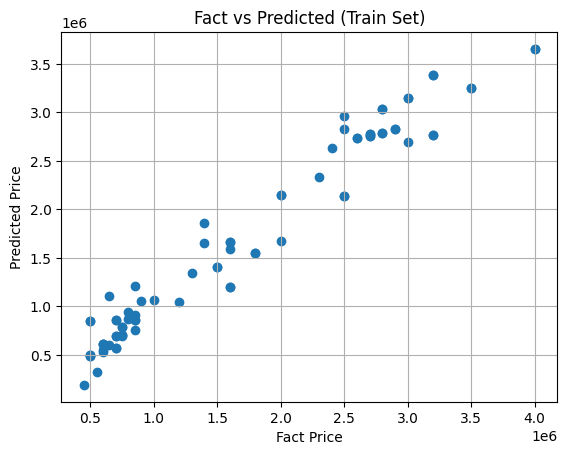

In [1348]:
plt.scatter(y_train, pred_train_1)
plt.xlabel("Fact Price")
plt.ylabel("Predicted Price")
plt.title("Fact vs Predicted (Train Set)")
plt.grid(True)
plt.show()

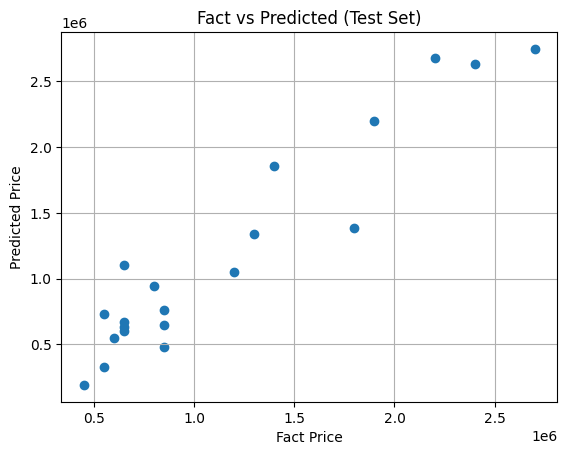

In [1349]:
plt.scatter(y_test, pred_test_1)
plt.xlabel("Fact Price")
plt.ylabel("Predicted Price")
plt.title("Fact vs Predicted (Test Set)")
plt.grid(True)
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [1350]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [1351]:
X_train_scaled

array([[ 0.56881254, -0.69387081,  0.27486176, ..., -0.33333333,
         3.22932987,  0.53530338],
       [-0.32344242, -0.03953291, -0.01832412, ..., -0.33333333,
        -0.30966177, -0.99413485],
       [-0.32344242, -0.03953291, -0.60469588, ..., -0.33333333,
        -0.30966177, -0.99413485],
       ...,
       [-0.32344242,  1.81442446, -0.60469588, ..., -0.33333333,
        -0.30966177,  0.53530338],
       [ 0.56881254, -0.69387081,  0.27486176, ..., -0.33333333,
        -0.30966177,  0.53530338],
       [ 0.56881254, -0.69387081, -0.60469588, ..., -0.33333333,
        -0.30966177, -0.99413485]])

In [1352]:
model.fit(X_train_scaled, y_train)
predictions_train_scaled = model.predict(X_train_scaled)
predictions_test_scaled = model.predict(X_test_scaled)

In [1353]:
loss_train_scaled = root_mean_squared_error(y_train, predictions_train_scaled)
loss_test_scaled = root_mean_squared_error(y_test, predictions_test_scaled)
r2_train_scaled = r2_score(y_train, predictions_train_scaled)
r2_test_scaled = r2_score(y_test, predictions_test_scaled)


print('Loss train: ', loss_train_1, ', Loss test: ', loss_test_1)
print('Loss train scaled: ', loss_train_scaled, ', Loss test scaled: ', loss_test_scaled)

print('R2 train: ', r2_train_1, ', R2 test: ', r2_test_1)
print('R2 train scaled: ', r2_train_scaled, ', R2 test scaled: ', r2_test_scaled)


Loss train:  210342.80162046358 , Loss test:  259601.2654272361
Loss train scaled:  210342.80162046402 , Loss test scaled:  259601.26542723502
R2 train:  0.958608310602088 , R2 test:  0.8509832680786682
R2 train scaled:  0.9586083106020877 , R2 test scaled:  0.8509832680786695


In [1354]:

model.coef_,


(array([ -11604.26097548,  -99713.958682  , -131884.63312348,
         -24683.08408026,  500000.50676501,   -1744.04881186,
        -185245.84076303,  115153.43959914,  319170.36426444,
         327174.23556801,   28102.28564934,  -52663.80937834,
         -58804.6936595 ,  -21572.04811437,  328326.89346603,
          59064.41312638,  130666.70171109,   13086.49737469,
          43335.06607908]),)

In [1355]:
coefficients = pd.Series(
    model.coef_,
    index=X_train_num.columns
).sort_values(key=abs, ascending=False)

print(coefficients)

power                500000.506765
Mercedes             328326.893466
BMW                  327174.235568
Audi                 319170.364264
is_petrol           -185245.840763
mileage             -131884.633123
Toyota               130666.701711
is_auto              115153.439599
kilometers_driven    -99713.958682
Tata                  59064.413126
Mahindra             -58804.693660
Hyundai              -52663.809378
owner_type_codes      43335.066079
Honda                 28102.285649
engine               -24683.084080
Maruti               -21572.048114
Volkswagen            13086.497375
year                 -11604.260975
seats                 -1744.048812
dtype: float64


#### Висновки завдання 7
Найбільш впливові
1) Power: більший Power -> вища ціна
2) Марки з + впливом: Mercedes, BMW, Audi. Машини дорожчого сегменту  
3) is_petrol має негативний вплив, тобто бензиновий тип двигуна зменшує ціну
4) Марки з - впливом: Hyundai, Mahindra, Ford. Машини масового споживання.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [1356]:
X_train_scaled_with_columns = pd.DataFrame(
    scaler.fit_transform(X_train_num),
    columns=X_train_num.columns,
    index=X_train_num.index
)
X_train_scaled_with_columns.head()

,year,kilometers_driven,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,3.000000,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.333333,-0.309662,0.535303


In [1357]:
X_test_scaled_with_columns = pd.DataFrame(
    scaler.fit_transform(X_test_num),
    columns=X_test_num.columns,
    index=X_test_num.index
)
X_test_scaled_with_columns.head()

,year,kilometers_driven,mileage,engine,power,seats,is_petrol,is_auto,Audi,BMW,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
17,-1.889822,1.238755,-1.039177,-0.552105,0.698329,-0.326164,0.904534,1.224745,3.000000,-0.229416,-0.229416,-0.577350,-0.229416,-0.229416,-0.229416,-0.229416,-0.333333,-0.420084,0.189358
41,0.377964,-0.150503,0.816497,-1.268311,-1.545298,-0.326164,0.904534,-0.816497,-0.333333,-0.229416,-0.229416,1.732051,-0.229416,-0.229416,-0.229416,-0.229416,-0.333333,-0.420084,1.451747
92,-1.133893,0.544126,0.074227,-0.081587,-0.563711,-0.326164,0.904534,-0.816497,-0.333333,-0.229416,-0.229416,-0.577350,-0.229416,-0.229416,-0.229416,-0.229416,-0.333333,2.380476,0.189358
14,1.133893,-1.076675,0.445362,-0.396811,-0.563711,2.283148,0.904534,-0.816497,-0.333333,-0.229416,-0.229416,-0.577350,-0.229416,4.358899,-0.229416,-0.229416,-0.333333,-0.420084,-1.073030
68,0.377964,-0.150503,0.816497,-1.017987,-0.816119,-0.326164,0.904534,-0.816497,-0.333333,-0.229416,-0.229416,-0.577350,-0.229416,-0.229416,-0.229416,-0.229416,-0.333333,-0.420084,1.451747


In [1358]:
Y = y_train
X = X_train_scaled_with_columns
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [1359]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           2.34e-34
Time:                        23:39:04   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.72e+0

In [1361]:
r2_1=results.rsquared
r_adj_1=results.rsquared_adj

print('Loss train: ', loss_train_1, ', Loss test: ', loss_test_1)
print('Loss train scaled: ', loss_train_scaled, ', Loss test scaled: ', loss_test_scaled)

print('R2 train: ', r2_train_1, ', R2 test: ', r2_test_1)
print('R2 train scaled: ', r2_train_scaled, ', R2 test scaled: ', r2_test_scaled)
print('R2 train sm: ', r2_1)


Loss train:  210342.80162046358 , Loss test:  259601.2654272361
Loss train scaled:  210342.80162046402 , Loss test scaled:  259601.26542723502
R2 train:  0.958608310602088 , R2 test:  0.8509832680786682
R2 train scaled:  0.9586083106020877 , R2 test scaled:  0.8509832680786695
R2 train sm:  0.9586083106020877


In [1362]:
significant_features_005=p_values[p_values < 0.05].index.tolist()
significant_features_005

['const',
 'mileage',
 'power',
 'is_petrol',
 'is_auto',
 'Audi',
 'BMW',
 'Ford',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Volkswagen']

In [1363]:
significant_features_025=p_values[p_values < 0.25].index.tolist()
significant_features_025

['const',
 'kilometers_driven',
 'mileage',
 'power',
 'is_petrol',
 'is_auto',
 'Audi',
 'BMW',
 'Ford',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Tata',
 'Volkswagen']

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [1364]:
X_train_scaled_significant005=X_train_scaled_with_columns[['mileage','power','is_petrol','is_auto','Audi','BMW','Hyundai','Mahindra','Maruti','Mercedes','Volkswagen']]
X_test_scaled_significant005=X_test_scaled_with_columns[['mileage','power','is_petrol','is_auto','Audi','BMW','Hyundai','Mahindra','Maruti','Mercedes','Volkswagen']]

In [1365]:
Y = y_train
X = X_train_scaled_significant005
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [1366]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           9.37e-40
Time:                        23:40:03   Log-Likelihood:                -1101.5
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      68   BIC:                             2256.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06    2.8e+04     59.965      0.0

In [1367]:
r2_2=results.rsquared
r_adj_2=results.rsquared_adj

print('Loss train: ', loss_train_1, ', Loss test: ', loss_test_1)
print('Loss train scaled: ', loss_train_scaled, ', Loss test scaled: ', loss_test_scaled)

print('R2 train: ', r2_train_1, ', R2 test: ', r2_test_1)
print('R2 train scaled: ', r2_train_scaled, ', R2 test scaled: ', r2_test_scaled)
print('R2 train sm: ', r2_1)
print('R2 train sm p_value 0.05: ', r2_2)




Loss train:  210342.80162046358 , Loss test:  259601.2654272361
Loss train scaled:  210342.80162046402 , Loss test scaled:  259601.26542723502
R2 train:  0.958608310602088 , R2 test:  0.8509832680786682
R2 train scaled:  0.9586083106020877 , R2 test scaled:  0.8509832680786695
R2 train sm:  0.9586083106020877
R2 train sm p_value 0.05:  0.9500667155409179


In [1368]:
print('Adj. r train sm: ', r_adj_1)
print('Adj. r train sm p_value 0.05: ', r_adj_2)

Adj. r train sm:  0.9455009422927488
Adj. r train sm p_value 0.05:  0.9419892724666546


####Висновок завдання 9
Після виключення статистично незначущих ознак значення R2 зменшилось на 0.75%, що є незначним. Модель стала "легшою" без втрати якості.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [1369]:
X_train_scaled_significant_025=X_train_scaled_with_columns[['kilometers_driven',
 'mileage',
 'power',
 'is_petrol',
 'is_auto',
 'Audi',
 'BMW',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Tata',
 'Volkswagen']]

In [1371]:
Y = y_train
X = X_train_scaled_significant_025
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [1372]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     93.17
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           2.18e-37
Time:                        23:40:23   Log-Likelihood:                -1099.5
No. Observations:                  80   AIC:                             2229.
Df Residuals:                      65   BIC:                             2265.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.79e+0

In [1297]:
r2_3=results.rsquared
r_adj_3=results.rsquared_adj

In [1373]:
print('Loss train: ', loss_train_1, ', Loss test: ', loss_test_1)
print('Loss train scaled: ', loss_train_scaled, ', Loss test scaled: ', loss_test_scaled)

print('R2 train: ', r2_train_1, ', R2 test: ', r2_test_1)
print('R2 train scaled: ', r2_train_scaled, ', R2 test scaled: ', r2_test_scaled)
print('R2 train sm: ', r2_1)
print('R2 train sm p_value 0.05: ', r2_2)
print('R2 train sm p_value 0.25: ', r2_3)




Loss train:  210342.80162046358 , Loss test:  259601.2654272361
Loss train scaled:  210342.80162046402 , Loss test scaled:  259601.26542723502
R2 train:  0.958608310602088 , R2 test:  0.8509832680786682
R2 train scaled:  0.9586083106020877 , R2 test scaled:  0.8509832680786695
R2 train sm:  0.9586083106020877
R2 train sm p_value 0.05:  0.9500667155409179
R2 train sm p_value 0.25:  0.9525323515753146


In [1374]:
print('Adj. r train sm: ', r_adj_1)
print('Adj. r train sm p_value 0.05: ', r_adj_2)
print('Adj. r train sm p_value 0.25: ', r_adj_3)

Adj. r train sm:  0.9455009422927488
Adj. r train sm p_value 0.05:  0.9419892724666546
Adj. r train sm p_value 0.25:  0.9423085503761516


####Висновок завдання 10
На основі фіч з p_value >0.25 значного покращення не видно (+0,67% до версії моделі з p_value_0.05_features, -0.08% до моделі з усіма фічами. )